In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [13]:
final2_df = pd.read_csv('final2_df.csv').iloc[:,1:]
final2_df = final2_df.set_index('State')
final2_df

,Year,Total Exp Diff,Democrats Communications Exp Diff,Republicans Communications Exp Diff,Democrats Advertisement Exp Diff,Republicans Advertisement Exp Diff,Democrats Research Exp Diff,Republicans Research Exp Diff,Democrats Others Exp Diff,Republicans Others Exp Diff,Democrats Logistics Exp Diff,Republicans Logistics Exp Diff,Democrats Exp Diff,Republicans Exp Diff,Democrats Votes Diff %,Republicans Votes Diff %,Winner,Democrats ROI,Republicans ROI
State,,,,,,,,,,,,,,,,,,,
AK,2016,33347569.34,1.19,-0.13,18.14,13.05,0.28,0.02,0.56,0.12,0.06,0.08,16.02,17.33,-4.77,-4.23,REPUBLICANS,-0.30,-0.24
AK,2020,-6524029.73,-0.60,-0.00,-2.29,-15.33,-0.28,-0.02,-0.56,-0.13,-0.06,-0.08,-16.28,-19.84,3.16,-2.04,REPUBLICANS,0.19,0.10
AL,2016,-5242427.56,-0.69,0.00,-2.45,-1.85,0.00,-0.06,-0.09,0.01,-0.12,0.00,-1.68,-3.61,-4.07,1.42,REPUBLICANS,2.42,0.39
AL,2020,26250445.90,0.75,0.64,15.17,8.46,0.03,0.09,0.13,0.47,0.44,0.07,5.22,13.20,2.21,-0.05,REPUBLICANS,0.42,-0.00
AR,2016,34026848.66,-0.14,0.43,12.29,21.18,-0.20,0.06,-0.13,0.33,-0.01,0.21,11.96,22.07,-3.20,0.05,REPUBLICANS,-0.27,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WI,2020,3827340.04,-0.26,-0.49,5.50,-0.84,-0.36,0.21,0.15,-0.06,0.05,0.00,12.84,-3.72,3.02,1.63,DEMOCRATS,0.24,0.44
WV,2016,-1893954.28,-0.06,0.02,-0.07,-1.81,0.00,0.04,-0.00,0.01,0.00,-0.03,-1.00,-0.89,-9.06,6.33,REPUBLICANS,9.06,7.11
WV,2020,26011715.78,0.87,0.20,14.22,9.44,0.00,-0.06,0.00,0.01,-0.00,0.01,12.38,12.19,3.22,0.00,REPUBLICANS,0.26,0.00


In [14]:
df_for_clus = final2_df[['Democrats Votes Diff % ', 'Republicans Votes Diff % ', 'Democrats Exp Diff','Republicans Exp Diff']]
df_for_clus

,Democrats Votes Diff %,Republicans Votes Diff %,Democrats Exp Diff,Republicans Exp Diff
State,,,,
AK,-4.77,-4.23,16.02,17.33
AK,3.16,-2.04,-16.28,-19.84
AL,-4.07,1.42,-1.68,-3.61
AL,2.21,-0.05,5.22,13.20
AR,-3.20,0.05,11.96,22.07
...,...,...,...,...
WI,3.02,1.63,12.84,-3.72
WV,-9.06,6.33,-1.00,-0.89
WV,3.22,0.00,12.38,12.19


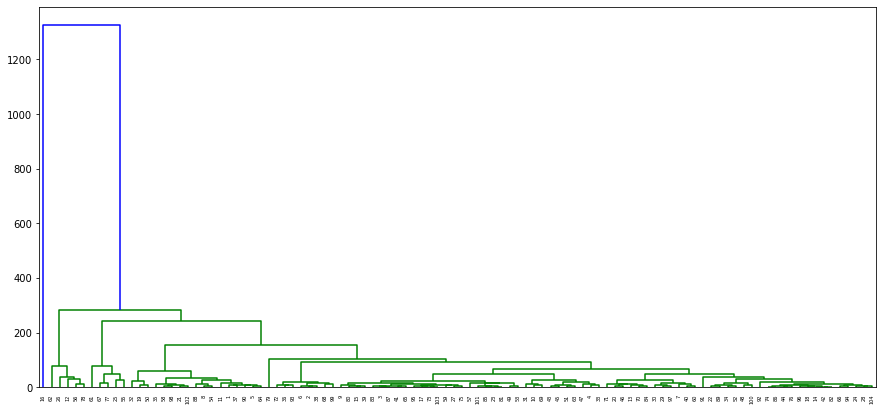

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(df_for_clus, 'ward')

labelList = range(1, df_for_clus.shape[0]+1)

plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='ascending',
            show_leaf_counts=True)
plt.show()

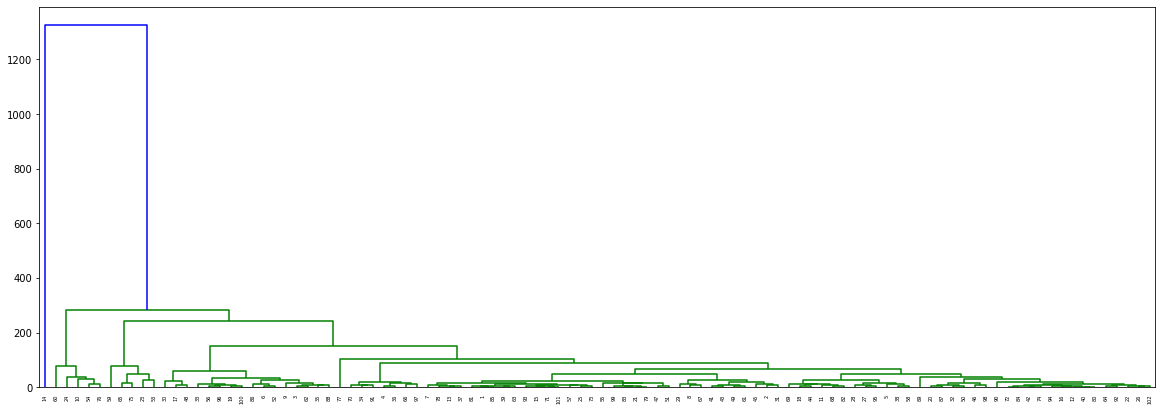

In [16]:
linked = linkage(df_for_clus.iloc[2:], 'ward')

labelList = range(1, df_for_clus.shape[0]-1)

plt.figure(figsize=(20, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='ascending',
            show_leaf_counts=False)
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_for_clus.iloc[2:])

array([0, 0, 4, 0, 0, 4, 0, 0, 4, 2, 0, 0, 0, 3, 0, 0, 4, 0, 4, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 4, 1, 2, 0, 4, 0, 0, 1, 2, 0, 4, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0], dtype=int64)

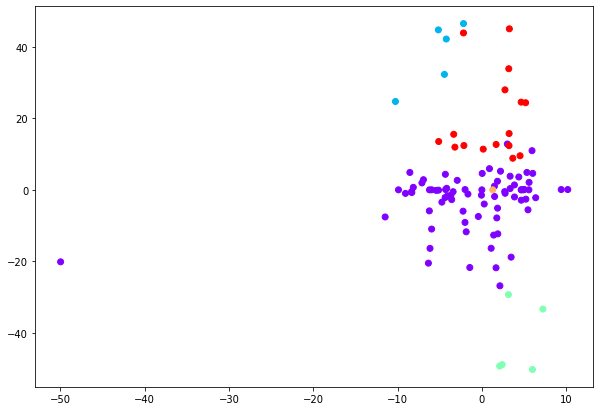

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(df_for_clus.iloc[2:,0], df_for_clus.iloc[2:,2], c=cluster.labels_, cmap='rainbow')

In [8]:
%matplotlib inline

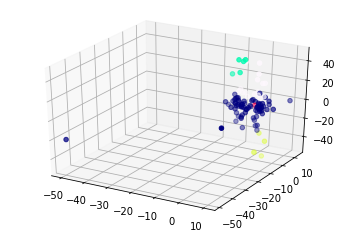

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = df_for_clus.iloc[2:,0]
ys = df_for_clus.iloc[2:,1]
zs = df_for_clus.iloc[2:,2]
ax.scatter(xs, ys, zs, marker='o', c= cluster.labels_, cmap = 'gist_ncar')

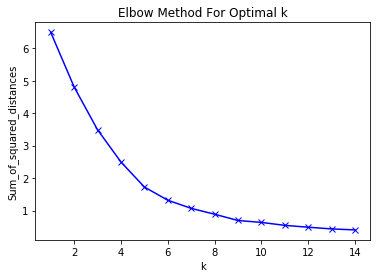

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
mms = MinMaxScaler()
mms.fit(df_for_clus)
data_transformed = mms.transform(df_for_clus)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [21]:
from ripser import ripser, Rips, lower_star_img
from persim import plot_diagrams
final_df = pd.read_csv('final_df.csv')
final_df

,state,year,dem_exp,rep_exp,votes_dem_perc,votes_gop_perc,white_pop,black_pop,other_pop
0,AK,2012,0.257396,2.513284,40.812659,54.801577,2.03051,0.18547,0.85627
1,AK,2016,16.277411,19.840838,36.041373,50.566677,1.96210,0.18680,0.91427
2,AK,2020,0.000000,0.003395,39.199327,48.522791,0.00000,0.00000,0.00000
3,AL,2012,1.679884,5.397640,38.432866,60.662360,33.71064,12.75628,1.68896
4,AL,2016,0.000000,1.790582,34.358027,62.083003,33.74106,13.01635,1.87784
...,...,...,...,...,...,...,...,...,...
148,WV,2016,6.702023,6.284432,26.476928,68.630575,17.14557,0.65227,0.51239
149,WV,2020,19.086103,18.475528,29.696521,68.631552,16.75122,0.64610,0.52415
150,WY,2012,0.000000,0.000000,27.818888,68.642622,5.37181,0.07671,0.31453
151,WY,2016,0.000000,0.253687,21.877357,68.172633,5.42675,0.07326,0.34214


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


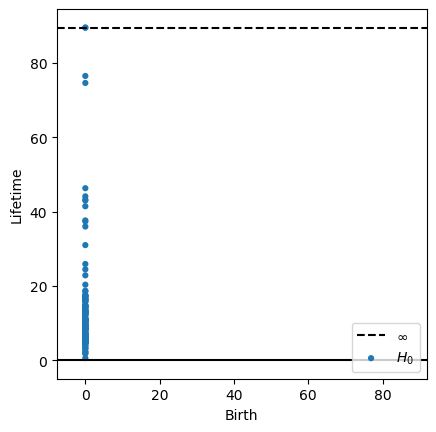

In [27]:
#Numerical dataset, without the state name
num_df = pd.DataFrame.copy(final_df)
num_df = num_df.drop(columns = ['state','year'])
rips = Rips()
diagrams = rips.fit_transform(num_df)
#This tells us the number of clusters in the original space
dgms = ripser(num_df, thresh =150)['dgms'][0]
plot_diagrams(dgms, lifetime = True)

In [28]:
import sklearn
import kmapper as km
from kmapper import jupyter


In [36]:
#this projects the data using TSNE method
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(num_df,
                                      projection = sklearn.manifold.TSNE(angle=0.5, init='random',method='barnes_hut',
                                                                         metric='cosine', min_grad_norm=1e-06, n_components=2, n_jobs=-1,verbose=1))
#list consisting of winning parties
dem_rep = []
for item in num_df['votes_dem_perc']>num_df['votes_gop_perc']:
    if item:
        dem_rep.append('DEMOCRAT')
    else:
        dem_rep.append('rep')
color_tip = list(zip(final_df['state'], final_df['year'], dem_rep,final_df['dem_exp'] - final_df['rep_exp'] ))


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='cosine', min_grad_norm=1e-06, n_components=2,
     n_iter=1000, n_iter_without_progress=300, n_jobs=-1, perplexity=30.0,
     random_state=None, verbose=1)
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (153, 7)

..Projecting data using: 
	TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='cosine', min_grad_norm=1e-06, n_components=2,
     n_iter=1000, n_iter_without_progress=300, n_jobs=-1, perplexity=30.0,
     random_state=None, verbose=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 153 samples in 0.000s...
[t-SNE] Computed neighbors for 153 samples in 0.128s...
[t-SNE] Computed conditional probabilities for sample 153 / 153
[t-SNE] Mean sigma: 0.131151
[t-

Mapping on data shaped (153, 2) using lens shaped (153, 2)

Creating 169 hypercubes.

Created 115 edges and 71 nodes in 0:00:08.025742.
Wrote visualization to: mapper_visualization_output.html
no display found. Using non-interactive Agg backend


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


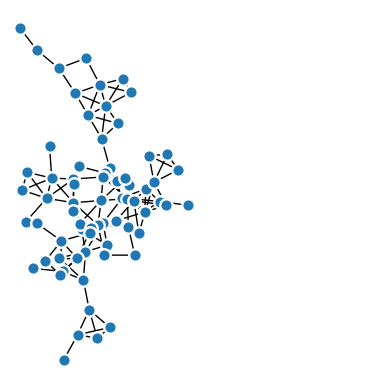

In [48]:
#graph describing the details of different clusters
graph = mapper.map(projected_data, 
                  clusterer = sklearn.cluster.DBSCAN(algorithm='auto', eps=0.15, leaf_size=30,
                                                     min_samples=2, n_jobs=-1),
                  cover = km.Cover(13,0.3))
#a way to look at the clusters and identify relationship between state politics and expenditures 
mapper.visualize(graph,
                 custom_tooltips = np.array(color_tip))
km.draw_matplotlib(graph)
#0.2, 5, cosine, 30, 0.65
plt.show()
jupyter.display('Network_Analysis.html')